Kiana Greek, 40135171
Programming Assignment 2, COMP 333 Data Analytics

Input - tidy dataframe with metadata
Writing a function that outputs a data frame with overall descriptions, central tendency & spread descriptions, and displays visual descriptions.

Part 1 - creating input dataframes for the method

In [42]:
import pandas as pd

# 3 dicts containing info for test data frames
metaSeries = pd.Series(['Nominal','Interval','Ordinal','Ratio'],index = ['Gender','IQ','Job Satisfaction','Salary'])
#test set 1
data1 = {'Sex': ['M','F','F','M','M','M'],
         'IQ': [85,100,110,65,90,95],
         'Job Satisfaction': [2,3,5,5,3,1],
         'Salary': [60000,65000,100000,120000,30000,42000]
        }
inputdf1 = pd.DataFrame(data1)

#test set 2
data2 = {'Sex': ['F','F','M','M','F','M','M'],
         'IQ': [65,104,95,75,83,111,76],
         'Job Satisfaction': [3,2,3,5,5,3,1],
         'Salary': [47500,65000,111000,77650,38000,87500,56750]
        }
inputdf2 = pd.DataFrame(data2)

#test set 3
data3 = {'Sex': ['F','F','M','M','F','M','F','F','M'],
         'IQ': [65,104,95,83,111,76,108,99,54],
         'Job Satisfaction': [3,2,3,5,3,1,4,1,5],
         'Salary': [22575,60000,105000,97500,33500,760000,56750,108500,126500]
        }
inputdf3 = pd.DataFrame(data3)

FUNCTION DDA
--------------

create the output data frame with columns and observations.
the observations in the output are the features from the input data frame.
used lists to store data for each row of the out dataframe.
each value in the output dataframe is stored in the list for the observation.
parts a,b1,b2,c are all in the method and there are comments where each one starts.
values are calculated and appended to the list for its observation in the order given by a,b,c

In [43]:
#imports for holding values and plotting
import numpy as np
import seaborn as sns #for plotting
import matplotlib.pyplot as plt #for plotting


def simpleDDA(self):
    #store self as a variable
    df = self

    #create data frame that the function will return
    DDAdescription = pd.DataFrame(columns=["Number of Observations","Number of Entries","Number of Unique Values","Number of Missing Entries",'Mode',"Median","Mean","Number of Unique Values in Entries","Range: Min","Range: Max",'IQR','Standard Deviation'], index=["Sex","IQ","Job Satisfaction","Salary"])

    #PART A - Feature:sex
    #List to store the values for each feature for returned dataframe
    sexAgg = list()
    #number of observations
    sexAgg.append(df["Sex"].size)
    #number of entries
    sexAgg.append(df["Sex"].size)
    #number of unique entries
    value = df['Sex'].nunique()
    sexAgg.append(df['Sex'].nunique())
    #number of missing entries
    sexAgg.append(df['Sex'].isnull().sum())

    #PART A - Feature: IQ
    iqAgg = list()
    #number of observations
    iqAgg.append(df["IQ"].size)
    #number of entries
    iqAgg.append(df["IQ"].size)
    #number of unique entries
    iqAgg.append(df['IQ'].nunique())
    #number of missing entries
    iqAgg.append(df['IQ'].isnull().sum())

    #PART A - Feature: Job Satisfaction
    jobsatisfactionAgg = list()
    #number of observations
    jobsatisfactionAgg.append(df["Job Satisfaction"].size)
    #number of entries
    jobsatisfactionAgg.append(df["Job Satisfaction"].size)
    #number of unique entries
    jobsatisfactionAgg.append(df['Job Satisfaction'].nunique())
    #number of missing entries
    jobsatisfactionAgg.append(df["Job Satisfaction"].isnull().sum())

    #PART A - Feature: Salary
    salaryAgg = list()
    #number of observations
    salaryAgg.append(df["Salary"].size)
    #number of entries
    salaryAgg.append(df["Salary"].size)
    #number of unique entries
    salaryAgg.append(df['Salary'].nunique())
    #number of missing entries
    salaryAgg.append(df['Salary'].isnull().sum())


    #PART B1
    #MODES
    sexAgg.append(df['Sex'].mode())
    iqAgg.append(df['IQ'].mode())
    jobsatisfactionAgg.append(df['Job Satisfaction'].mode())
    salaryAgg.append(df['Salary'].mode())

    #MEDIAN
    sexAgg.append('NaN')
    iqAgg.append(df['IQ'].median())
    jobsatisfactionAgg.append(df['Job Satisfaction'].median())
    salaryAgg.append(df['Salary'].median())

    #MEAN
    sexAgg.append('NaN')
    iqAgg.append(df['IQ'].mean())
    jobsatisfactionAgg.append('NaN')
    salaryAgg.append(df['Salary'].mean())

    #B2
    #number of UNIQUE ENTRIES
    sexAgg.append(df.Sex.nunique())
    iqAgg.append('NaN')
    jobsatisfactionAgg.append('NaN')
    salaryAgg.append('NaN')

    #RANGE: min
    sexAgg.append('NaN')
    iqAgg.append(df['IQ'].min())
    jobsatisfactionAgg.append(df['Job Satisfaction'].min())
    salaryAgg.append(df['Salary'].min())

    #RANGE:max
    sexAgg.append('NaN')
    iqAgg.append(df['IQ'].max())
    jobsatisfactionAgg.append(df['Job Satisfaction'].max())
    salaryAgg.append(df['Salary'].max())

    #IQR for categorical value
    sexAgg.append('NaN')
    #IQR for other data types
    #observation - IQ
    q1 = df['IQ'].quantile(0.25)
    q3 = df['IQ'].quantile(0.75)
    iqr = q3-q1
    iqAgg.append(iqr)
    #observation -job satisfaction
    q1 = df['Job Satisfaction'].quantile(0.25)
    q3 = df['Job Satisfaction'].quantile(0.75)
    iqr = q3-q1
    jobsatisfactionAgg.append(iqr)
    #observation - salary
    q1 = df['Salary'].quantile(0.25)
    q3 = df['Salary'].quantile(0.75)
    iqr = q3-q1
    salaryAgg.append(iqr)

    #Standard Deviation
    sexAgg.append('NaN')
    #standard deviation for other data types
    iqAgg.append(df['IQ'].std())
    jobsatisfactionAgg.append(df['Job Satisfaction'].std())
    salaryAgg.append(df['Salary'].std())

    #Populate data frame with calculated values from parts a,b
    DDAdescription.loc["Sex"] = np.asarray(sexAgg,dtype=object)
    DDAdescription.loc["IQ"] = np.asarray(iqAgg,dtype=object)
    DDAdescription.loc["Job Satisfaction"] = np.asarray(jobsatisfactionAgg,dtype=object)
    DDAdescription.loc["Salary"] = np.asarray(salaryAgg,dtype=object)

    #PART C
    #figure for subplots
    %matplotlib inline
    fig, ((ax1), ax2, ax3) = plt.subplots(1,3,constrained_layout = True)
    #histogram for number of each value in job satisfaction
    ax1.hist(df['Job Satisfaction'], bins=5)
    ax1.set_ylabel('Count')
    ax1.set_xlabel('Job Satisfaction Rating')
    ax1.set_xticks([1,2,3,4,5])
    #histogram for count of each sex
    ax2.hist(df['Sex'])
    ax2.set_ylabel('Count')
    ax2.set_xlabel('Sex')
    #scatter plot for iq and job satisfaction
    ax3.scatter(df['Job Satisfaction'], y = df['IQ'])
    ax3.set_ylabel('IQ')
    ax3.set_xlabel('Job Satisfaction')
    ax3.set_xticks([1,2,3,4,5])
    # 2 scatter plots for relationship between salary-iq and salary-job satisfaction
    g = sns.PairGrid(df, y_vars=["Salary"], x_vars=["IQ", "Job Satisfaction"],height=4)
    g.map(plt.scatter)

    #return dataframe
    return DDAdescription

test sample 1

,Number of Observations,Number of Entries,Number of Unique Values,Number of Missing Entries,Mode,Median,Mean,Number of Unique Values in Entries,Range: Min,Range: Max,IQR,Standard Deviation
Sex,6,6,2,0,"0 M Name: Sex, dtype: object",NaN,NaN,2,NaN,NaN,NaN,NaN
IQ,6,6,6,0,0 65 1 85 2 90 3 95 4 100 5...,92.5,90.833333,NaN,65,110,12.5,15.302505
Job Satisfaction,6,6,4,0,"0 3 1 5 Name: Job Satisfaction, dtype: i...",3.0,NaN,NaN,1,5,2.25,1.602082
Salary,6,6,6,0,0 30000 1 42000 2 60000 3 6500...,62500.0,69500.0,NaN,30000,120000,44750.0,34372.954485


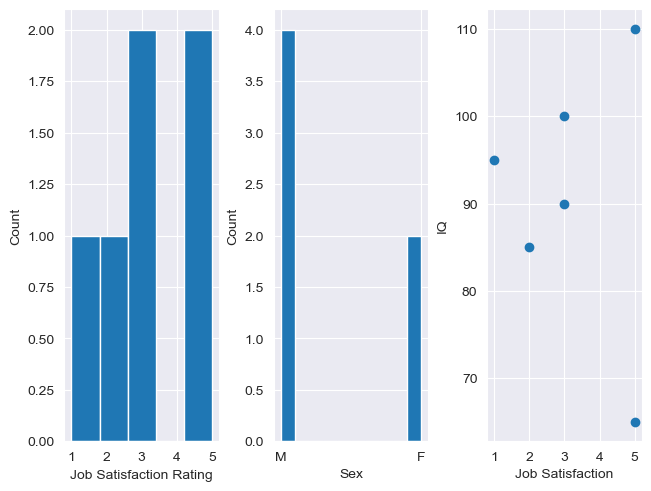

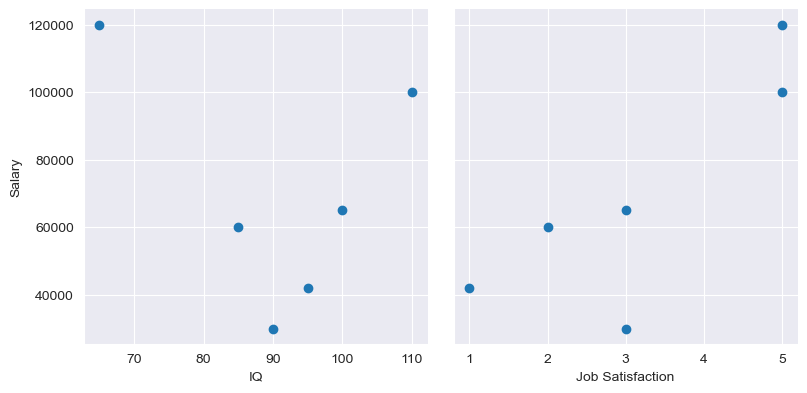

In [44]:
df1 = simpleDDA(inputdf1)
df1.head()

test sample 2

,Number of Observations,Number of Entries,Number of Unique Values,Number of Missing Entries,Mode,Median,Mean,Number of Unique Values in Entries,Range: Min,Range: Max,IQR,Standard Deviation
Sex,7,7,2,0,"0 M Name: Sex, dtype: object",NaN,NaN,2,NaN,NaN,NaN,NaN
IQ,7,7,7,0,0 65 1 75 2 76 3 83 4 95 5...,83.0,87.0,NaN,65,111,24.0,16.802778
Job Satisfaction,7,7,4,0,"0 3 Name: Job Satisfaction, dtype: int64",3.0,NaN,NaN,1,5,1.5,1.46385
Salary,7,7,7,0,0 38000 1 47500 2 56750 3 6500...,65000.0,69057.142857,NaN,38000,111000,30450.0,25067.781922


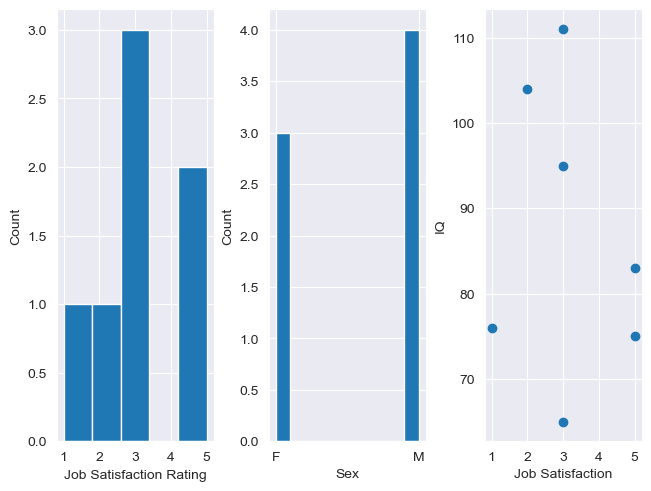

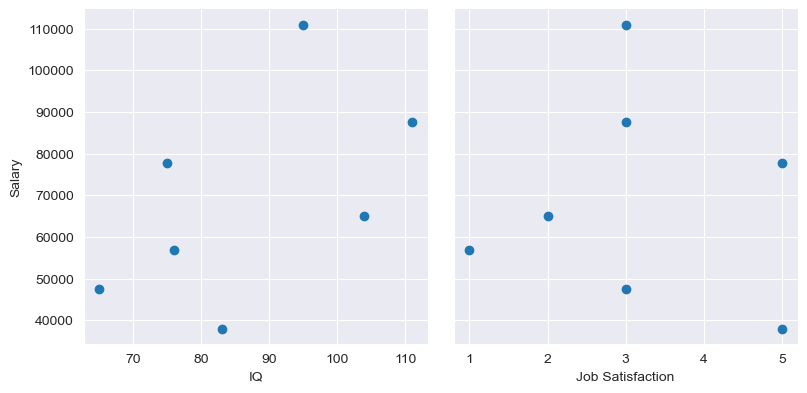

In [45]:
df2 = simpleDDA(inputdf2)
df2.head()

test sample 3

,Number of Observations,Number of Entries,Number of Unique Values,Number of Missing Entries,Mode,Median,Mean,Number of Unique Values in Entries,Range: Min,Range: Max,IQR,Standard Deviation
Sex,9,9,2,0,"0 F Name: Sex, dtype: object",NaN,NaN,2,NaN,NaN,NaN,NaN
IQ,9,9,9,0,0 54 1 65 2 76 3 83 4 95 5...,95.0,88.333333,NaN,54,111,28.0,20.024984
Job Satisfaction,9,9,5,0,"0 3 Name: Job Satisfaction, dtype: int64",3.0,NaN,NaN,1,5,2.0,1.5
Salary,9,9,9,0,0 22575 1 33500 2 56750 3 6000...,97500.0,152258.333333,NaN,22575,760000,51750.0,230682.355334


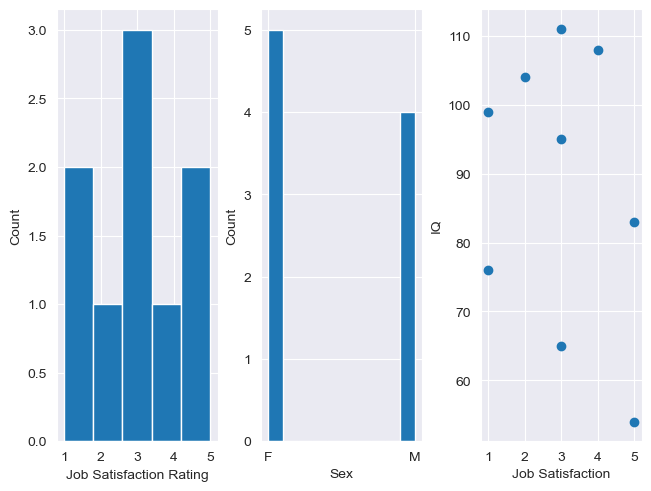

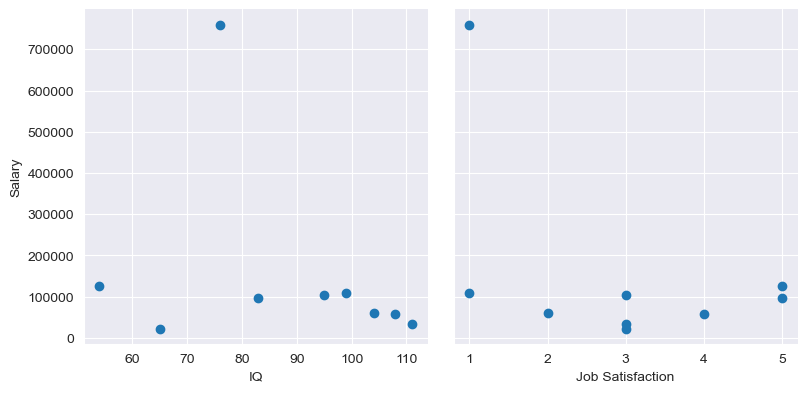

In [46]:
df3 = simpleDDA(inputdf3)
df3.head()